In [16]:
import numpy as np
import pandas as pd
import geopandas

### Importando os arquivos

In [87]:
data = pd.read_excel('/home/igormossinato/Documents/IBGE/Setores Censitários/SP_Capital_20190823/Base informaçoes setores2010 universo SP_Capital/EXCEL/DomicilioRenda_SP1.xls')
poly = geopandas.read_file('/home/igormossinato/Documents/IBGE/Setores Censitários/SAO_PAULO.geojson')

### Definindo o padrão da coluna para inteiro

In [88]:
poly['Name'] = poly['Name'].astype('int64')

### Realiza o merge entre polígonos e dados

In [89]:
data_merged = poly.merge(data, 'inner', left_on = 'Name', right_on = 'Cod_setor')

In [90]:
data_merged.head(2)

,Name,description,Field_6,Field_4,Field_5,Field_2,Field_3,Field_1,geometry,Cod_setor,...,V005,V006,V007,V008,V009,V010,V011,V012,V013,V014
0,355030817000246,None,,CAMPO LIMPO,,355030817000246,SÃO PAULO,3550308,"POLYGON ((-46.76373 -23.62597, -46.76399 -23.6...",355030817000246,...,0,1,6,12,18,9,9,4,0,8
1,355030804000092,None,,ARICANDUVA,,355030804000092,SÃO PAULO,3550308,"POLYGON ((-46.51021 -23.58254, -46.51080 -23.5...",355030804000092,...,0,4,30,68,73,28,15,3,0,7


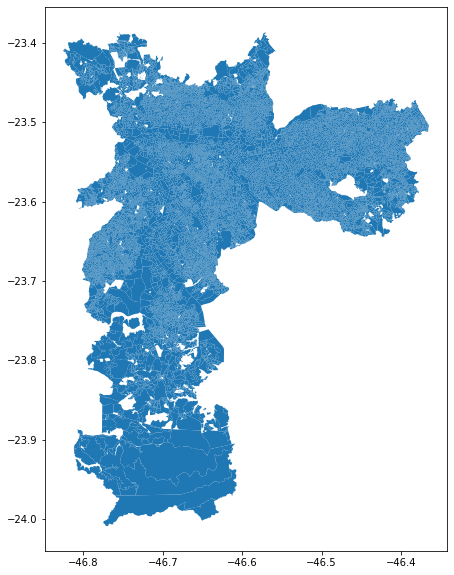

In [116]:
data_merged.plot(figsize = (20,10))

### Realizando a limpeza dos dados
Substituindo informações que possuem o valor 'X' por 0

In [113]:
data_merged['V002'] = data_merged['V002'].replace('X',0).astype('int64')

### Escala de Cores
utilizando o comando column

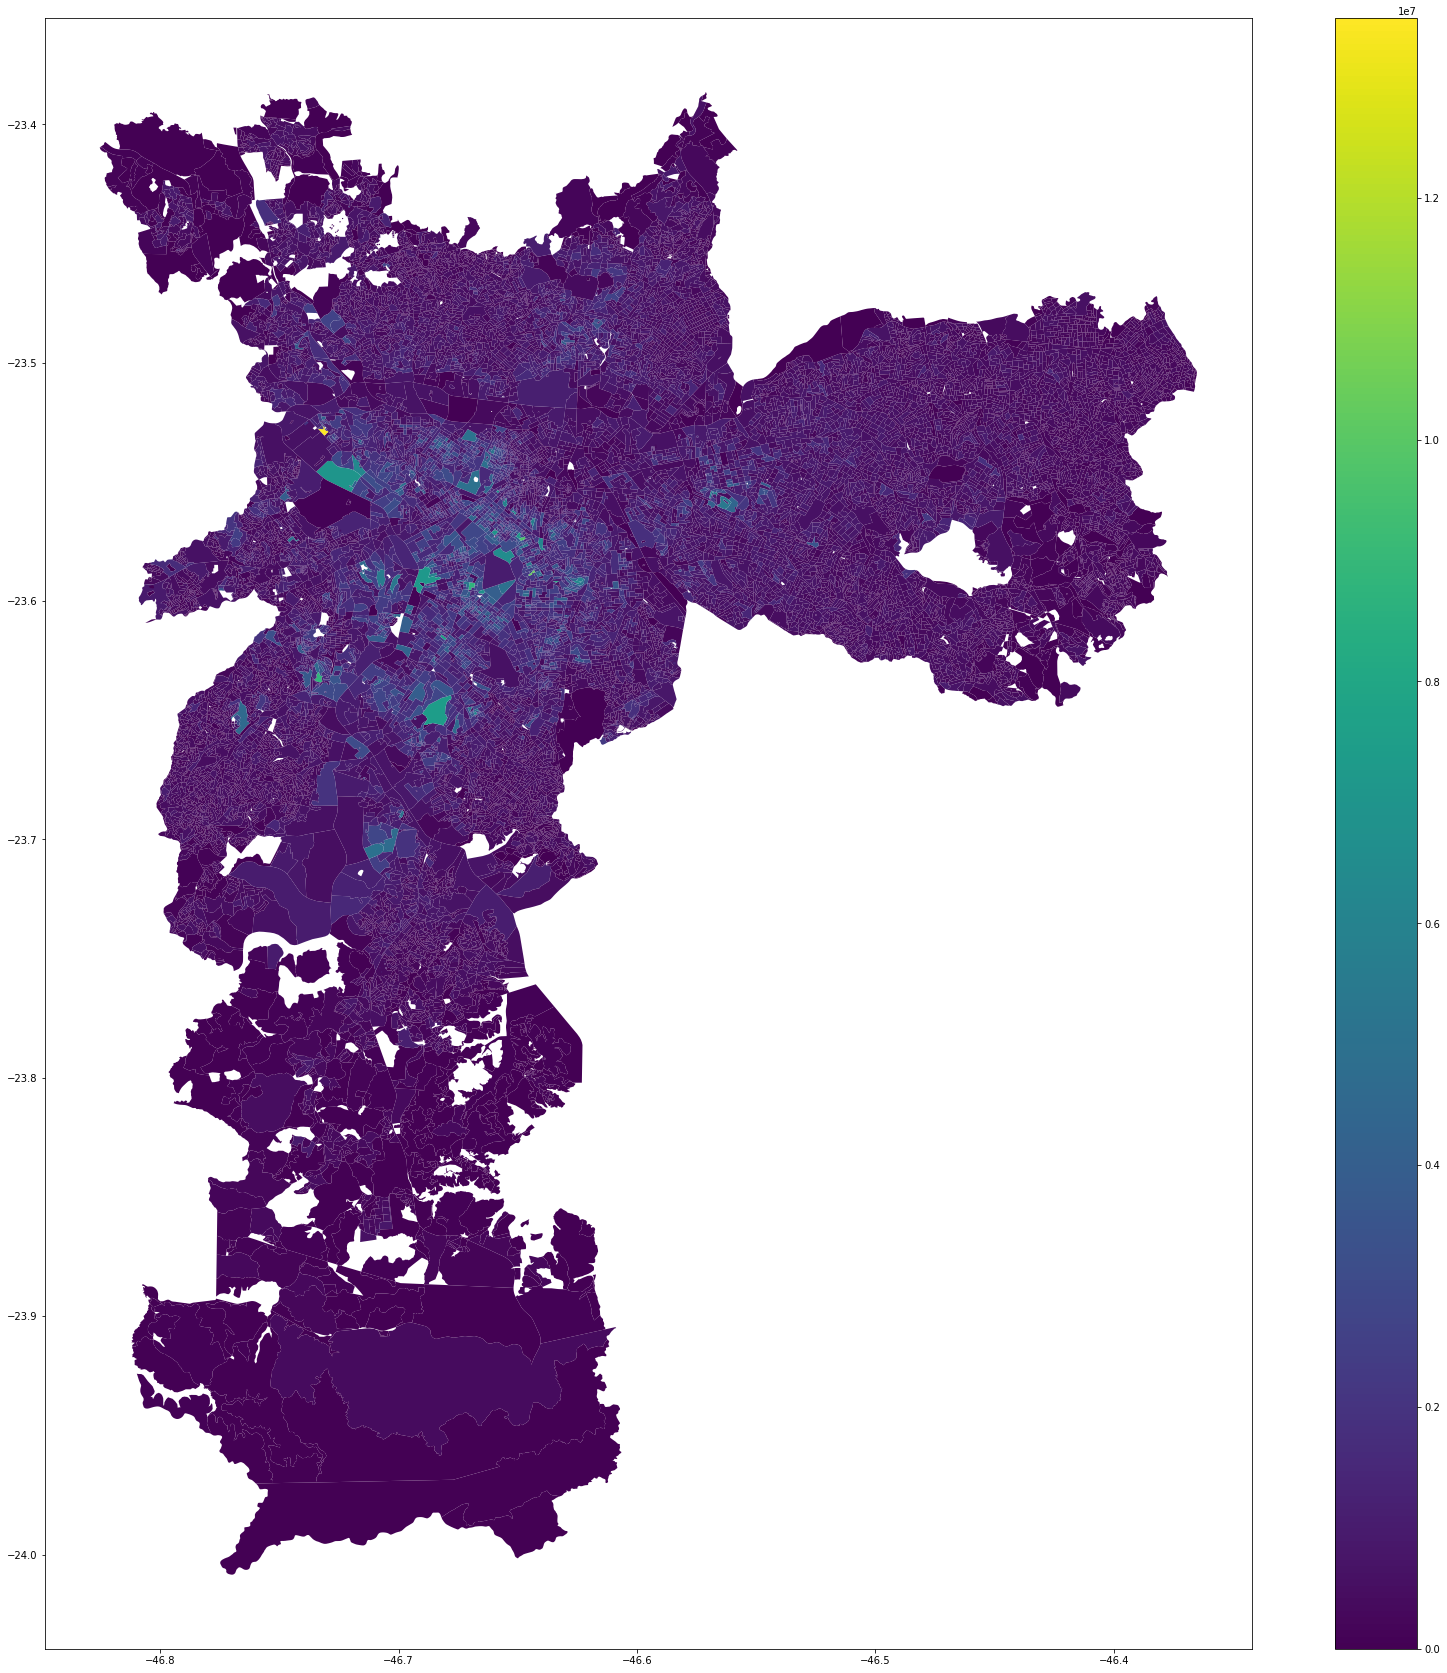

In [114]:
data_merged.plot(figsize = (30,30), column = 'V002', legend = True)